In [140]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [141]:
# SETTING UP THE FOLDERS
folder_link = "data"
fao_csv = folder_link + "/FAO.csv"
faostat_csv = folder_link + "/FAOSTAT.csv"

# Task 1: Data Wrangling

1. Data Cleaning:
- Load both datasets into Pandas DataFrames.
- Create a data dictionary.
- Check for and handle any missing values. Provide a brief explanation of the method you used to handle missing data.
- Remove any duplicate rows from both datasets.
- Standardize column names to ensure consistency between both datasets.



In [142]:
# Load both datasets

fao_df = pd.read_csv(fao_csv, encoding='ISO-8859-1')
faostat_df = pd.read_csv(faostat_csv, encoding='ISO-8859-1')

In [143]:
fao_df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [144]:
faostat_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,35530.081,X,International reliable sources,"UNDESA, Population Division â World Populati..."
1,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,2930.187,X,International reliable sources,"UNDESA, Population Division â World Populati..."
2,OA,Annual population,4,Algeria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,41318.142,X,International reliable sources,"UNDESA, Population Division â World Populati..."
3,OA,Annual population,5,American Samoa,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,55.641,X,International reliable sources,"UNDESA, Population Division â World Populati..."
4,OA,Annual population,6,Andorra,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,76.965,X,International reliable sources,"UNDESA, Population Division â World Populati..."


In [145]:
fao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [146]:
faostat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       231 non-null    object 
 1   Domain            231 non-null    object 
 2   Area Code         231 non-null    int64  
 3   Area              231 non-null    object 
 4   Element Code      231 non-null    int64  
 5   Element           231 non-null    object 
 6   Item Code         231 non-null    int64  
 7   Item              231 non-null    object 
 8   Year Code         231 non-null    int64  
 9   Year              231 non-null    int64  
 10  Unit              231 non-null    object 
 11  Value             231 non-null    float64
 12  Flag              231 non-null    object 
 13  Flag Description  231 non-null    object 
 14  Note              231 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 27.2+ KB


In [147]:
# Create a data dictionary 

# function to create a data dictionary
def create_data_dictionary(df):
    data_dict = {
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Description': ['Description needed'] * len(df.columns)  # Placeholder for descriptions
    }
    return pd.DataFrame(data_dict)

# generate data dictionaries using the function
faodata_dict = create_data_dictionary(fao_df)
faostatdata_dict = create_data_dictionary(faostat_df)

# update descriptions for FAO data dictionary
descriptions_fao = {
    'Area Abbreviation': 'Abbreviation for the area (e.g., country or region)',
    'Area Code': 'Unique code assigned to the area',
    'Area': 'Name of the area (e.g., country or region)',
    'Item Code': 'Unique code for the item (e.g., crop, livestock)',
    'Item': 'Name of the item (e.g., wheat, rice)',
    'Element Code': 'Unique code for the measurement element (e.g., production, yield)',
    'Element': 'Name of the element (e.g., production, yield, consumption)',
    'Unit': 'Unit of measurement (e.g., tons, hectares)',
    'latitude': 'Latitude coordinate of the area',
    'longitude': 'Longitude coordinate of the area',
    'Y1961': 'Data for the year 1961',
    'Y1962': 'Data for the year 1962',
    'Y1963': 'Data for the year 1963',
    'Y1964': 'Data for the year 1964',
    'Y1965': 'Data for the year 1965',
    'Y1966': 'Data for the year 1966',
    'Y1967': 'Data for the year 1967',
    'Y1968': 'Data for the year 1968',
    'Y1969': 'Data for the year 1969',
    'Y1970': 'Data for the year 1970',
    'Y1971': 'Data for the year 1971',
    'Y1972': 'Data for the year 1972',
    'Y1973': 'Data for the year 1973',
    'Y1974': 'Data for the year 1974',
    'Y1975': 'Data for the year 1975',
    'Y1976': 'Data for the year 1976',
    'Y1977': 'Data for the year 1977',
    'Y1978': 'Data for the year 1978',
    'Y1979': 'Data for the year 1979',
    'Y1980': 'Data for the year 1980',
    'Y1981': 'Data for the year 1981',
    'Y1982': 'Data for the year 1982',
    'Y1983': 'Data for the year 1983',
    'Y1984': 'Data for the year 1984',
    'Y1985': 'Data for the year 1985',
    'Y1986': 'Data for the year 1986',
    'Y1987': 'Data for the year 1987',
    'Y1988': 'Data for the year 1988',
    'Y1989': 'Data for the year 1989',
    'Y1990': 'Data for the year 1990',
    'Y1991': 'Data for the year 1991',
    'Y1992': 'Data for the year 1992',
    'Y1993': 'Data for the year 1993',
    'Y1994': 'Data for the year 1994',
    'Y1995': 'Data for the year 1995',
    'Y1996': 'Data for the year 1996',
    'Y1997': 'Data for the year 1997',
    'Y1998': 'Data for the year 1998',
    'Y1999': 'Data for the year 1999',
    'Y2000': 'Data for the year 2000',
    'Y2001': 'Data for the year 2001',
    'Y2002': 'Data for the year 2002',
    'Y2003': 'Data for the year 2003',
    'Y2004': 'Data for the year 2004',
    'Y2005': 'Data for the year 2005',
    'Y2006': 'Data for the year 2006',
    'Y2007': 'Data for the year 2007',
    'Y2008': 'Data for the year 2008',
    'Y2009': 'Data for the year 2009',
    'Y2010': 'Data for the year 2010',
    'Y2011': 'Data for the year 2011',
    'Y2012': 'Data for the year 2012',
    'Y2013': 'Data for the year 2013'
}

# update the FAO dataframe with the descriptions
faodata_dict['Description'] = faodata_dict['Column Name'].map(descriptions_fao).fillna('Description needed')

# update descriptions for FAOSTAT data dictionary
descriptions_faostat = {
    'Domain Code': 'Unique code for the domain or category of data (e.g., agriculture, forestry)',
    'Domain': 'Name of the domain or category of data',
    'Area Code': 'Unique numerical code assigned to the area (e.g., country, region)',
    'Area': 'Name of the area (e.g., country or region)',
    'Element Code': 'Unique code for the type of measurement (e.g., production, yield)',
    'Element': 'Type of data being measured (e.g., production, yield, consumption)',
    'Item Code': 'Unique numerical code assigned to the item (e.g., crop, livestock)',
    'Item': 'Name of the item (e.g., wheat, rice)',
    'Year Code': 'Unique code for the year of data',
    'Year': 'Year of the data',
    'Unit': 'Unit of measurement (e.g., tons, hectares)',
    'Value': 'Measured value for the specified item, area, and year',
    'Flag': 'Indicator of data quality or special conditions (e.g., missing data, estimated values)',
    'Flag Description': 'Description of the flag used to denote data quality or special conditions',
    'Note': 'Additional notes or comments related to the data entry'
}

# update the FAOSTAT dataframe with the descriptions
faostatdata_dict['Description'] = faostatdata_dict['Column Name'].map(descriptions_faostat).fillna('Description needed')

# print updated data dictionaries
print("Updated FAO Data Dictionary:\n", faodata_dict)



Updated FAO Data Dictionary:
                          Column Name Data Type  \
Area Abbreviation  Area Abbreviation    object   
Area Code                  Area Code     int64   
Area                            Area    object   
Item Code                  Item Code     int64   
Item                            Item    object   
...                              ...       ...   
Y2009                          Y2009   float64   
Y2010                          Y2010   float64   
Y2011                          Y2011   float64   
Y2012                          Y2012     int64   
Y2013                          Y2013     int64   

                                                         Description  
Area Abbreviation  Abbreviation for the area (e.g., country or re...  
Area Code                           Unique code assigned to the area  
Area                      Name of the area (e.g., country or region)  
Item Code           Unique code for the item (e.g., crop, livestock)  
Item          

In [148]:
print("\nUpdated FAOSTAT Data Dictionary:\n", faostatdata_dict)


Updated FAOSTAT Data Dictionary:
                        Column Name Data Type  \
Domain Code            Domain Code    object   
Domain                      Domain    object   
Area Code                Area Code     int64   
Area                          Area    object   
Element Code          Element Code     int64   
Element                    Element    object   
Item Code                Item Code     int64   
Item                          Item    object   
Year Code                Year Code     int64   
Year                          Year     int64   
Unit                          Unit    object   
Value                        Value   float64   
Flag                          Flag    object   
Flag Description  Flag Description    object   
Note                          Note    object   

                                                        Description  
Domain Code       Unique code for the domain or category of data...  
Domain                       Name of the domain or categ

In [149]:
# Check for and handle any missing values. Provide a brief explanation of the method you used to handle missing data.

# Check for missing values in FAO dataset
print("FAO Dataset Missing Values:")
fao_df.info()

FAO Dataset Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64

In [150]:
# Check for and handle any missing values. Provide a brief explanation of the method you used to handle missing data.

# Check for missing values in FAOSTAT dataset
print("\nFAOSTAT Dataset Missing Values:")
faostat_df.info()


FAOSTAT Dataset Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       231 non-null    object 
 1   Domain            231 non-null    object 
 2   Area Code         231 non-null    int64  
 3   Area              231 non-null    object 
 4   Element Code      231 non-null    int64  
 5   Element           231 non-null    object 
 6   Item Code         231 non-null    int64  
 7   Item              231 non-null    object 
 8   Year Code         231 non-null    int64  
 9   Year              231 non-null    int64  
 10  Unit              231 non-null    object 
 11  Value             231 non-null    float64
 12  Flag              231 non-null    object 
 13  Flag Description  231 non-null    object 
 14  Note              231 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 27.2+ KB


In [151]:
## only FAO has null values so we will handle that

## first drop rows with everything as null
fao_df.dropna(how='all').shape

(21477, 63)

Explanation: In this scenario, we need to handle missing values in a time-series dataset. Since the dataset contains various year columns with potential missing values, we will assume that data points for nearby years are likely to be similar. This assumption is based on the idea that values for adjacent years are often correlated, and drastic changes from one year to the next are unlikely.

To address missing values, we use the fillna() method from Pandas, which provides strategies to fill these gaps. Specifically, we’ll use two methods:

'ffill' (Forward Fill): This method propagates the last valid observation forward to the next missing value. It’s based on the assumption that the data from the previous year is a good estimate for the missing data in the current year. In other words, if a year’s data is missing, it will be filled with the most recent previous year’s value.

'bfill' (Backward Fill): This method propagates the next valid observation backward to fill the missing value. It assumes that if a future year’s data is available, it can be used to fill in the missing values for earlier years. This approach fills missing values with the subsequent year’s value if available.

In [152]:
## dropping rows with everything as null removed nothing, which means only specific columns for each row have null values

## based on the observation of the data in FAO, some years start with null values (e.g., years where no data is provided) but later years have data, therefore we cannot simply
## delete those rows because the data for later years are still valuable data

## to handle the missing values, we perform a forward fill and a backward fill

# check for missing values in the FAO dataset
print("Initial Missing Values Summary:")
print(fao_df.isnull().sum())

# Identify year columns (assuming they start with 'Y')
year_columns = [col for col in fao_df.columns if col.startswith('Y')]

# display the columns identified for year data
print("Year Columns:")
print(year_columns)

# apply forward fill to year columns
fao_df[year_columns] = fao_df[year_columns].fillna(method='ffill', axis=1)

# apply backward fill to any remaining missing values
fao_df[year_columns] = fao_df[year_columns].fillna(method='bfill', axis=1)

# verify missing values after handling
print("\nMissing Values After Handling:")
print(fao_df.isnull().sum())

# print a sample of the cleaned data to verify
print("\nSample of Cleaned FAO Data:")
print(fao_df.head())

Initial Missing Values Summary:
Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64
Year Columns:
['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013']

Missing Values After Handling:
Area Abbreviation    0
Area Code            0
Area                 0
Item Code            0
Item                 0
                    ..
Y2009 

C:\Users\Acwer\AppData\Local\Temp\ipykernel_8508\3541634840.py:20: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Acwer\AppData\Local\Temp\ipykernel_8508\3541634840.py:23: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [153]:
fao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              21477 non-null  float64
 11  Y1962              21477 non-null  float64
 12  Y1963              21477 non-null  float64
 13  Y1964              21477 non-null  float64
 14  Y1965              21477 non-null  float64
 15  Y1966              21477 non-null  float64
 16  Y1967              214

In [154]:
# Removing Duplicatites

# Check initial counts of duplicate rows
print("Initial Duplicate Rows in FAO Dataset:", fao_df.duplicated().sum())
print("Initial Duplicate Rows in FAOSTAT Dataset:", faostat_df.duplicated().sum())

# Remove duplicate rows from FAO dataset
fao_df_cleaned = fao_df.drop_duplicates()

# Remove duplicate rows from FAOSTAT dataset
faostat_df_cleaned = faostat_df.drop_duplicates()

# Verify that duplicates have been removed
print("\nDuplicate Rows After Cleaning in FAO Dataset:", fao_df_cleaned.duplicated().sum())
print("Duplicate Rows After Cleaning in FAOSTAT Dataset:", faostat_df_cleaned.duplicated().sum())


Initial Duplicate Rows in FAO Dataset: 0
Initial Duplicate Rows in FAOSTAT Dataset: 0

Duplicate Rows After Cleaning in FAO Dataset: 0
Duplicate Rows After Cleaning in FAOSTAT Dataset: 0


In [155]:
fao_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              21477 non-null  float64
 11  Y1962              21477 non-null  float64
 12  Y1963              21477 non-null  float64
 13  Y1964              21477 non-null  float64
 14  Y1965              21477 non-null  float64
 15  Y1966              21477 non-null  float64
 16  Y1967              214

In [156]:
faostat_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       231 non-null    object 
 1   Domain            231 non-null    object 
 2   Area Code         231 non-null    int64  
 3   Area              231 non-null    object 
 4   Element Code      231 non-null    int64  
 5   Element           231 non-null    object 
 6   Item Code         231 non-null    int64  
 7   Item              231 non-null    object 
 8   Year Code         231 non-null    int64  
 9   Year              231 non-null    int64  
 10  Unit              231 non-null    object 
 11  Value             231 non-null    float64
 12  Flag              231 non-null    object 
 13  Flag Description  231 non-null    object 
 14  Note              231 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 27.2+ KB


In [157]:
# Standardize column names to ensure consistency between both datasets.

# Change column names to uppercase
fao_df_cleaned.columns = fao_df_cleaned.columns.str.upper()
faostat_df_cleaned.columns = faostat_df_cleaned.columns.str.upper()

# Change column with spaces replaced with underscores _
fao_df_cleaned.columns = fao_df_cleaned.columns.str.replace(' ', '_')
faostat_df_cleaned.columns = faostat_df_cleaned.columns.str.replace(' ', '_')

# Display updated column names for verification
print("Updated FAO Columns:", fao_df_cleaned.columns)
print("Updated FAOSTAT Columns:", faostat_df_cleaned.columns)



Updated FAO Columns: Index(['AREA_ABBREVIATION', 'AREA_CODE', 'AREA', 'ITEM_CODE', 'ITEM',
       'ELEMENT_CODE', 'ELEMENT', 'UNIT', 'LATITUDE', 'LONGITUDE', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')
Updated FAOSTAT Columns: Index(['DOMAIN_CODE', 'DOMAIN', 'AREA_CODE', 'AREA', 'ELEMENT_CODE', 'ELEMENT',
       'ITEM_CODE', 'ITEM', 'YEAR_CODE', 'YEAR', 'UNIT', 'VALUE', 'FLAG',
       'FLAG_DESCRIPTION', 'NOTE'],
      dtype='object')


2. Data Merging:
- Merge the two datasets using a relevant key (e.g., Country, Year, or any other common column). Justify your choice of the merging key(s).
- Create a new DataFrame with the merged data. Ensure the merged DataFrame contains only the columns necessary for analysis.

In [158]:
# Merge the two datasets using a relevant key (e.g., Country, Year, or any other common column). Justify your choice of the merging key(s).
# Create a new DataFrame with the merged data. Ensure the merged DataFrame contains only the columns necessary for analysis.

# transform FAO data - melt the year columns into rows
# compile all column names for years
year_columns = [col for col in fao_df.columns if col.startswith('Y')]

# perform the melt operation
fao_melted_df = pd.melt(fao_df_cleaned, id_vars=['AREA_CODE', 'AREA', 'ITEM_CODE', 'ELEMENT_CODE', 'ITEM', 'ELEMENT'], 
                        value_vars=year_columns, var_name='YEAR', value_name='PRODUCTION_VALUE')

# clean the 'Year' column (remove the 'Y' prefix and convert to int)
fao_melted_df['YEAR'] = fao_melted_df['YEAR'].str[1:].astype(int)

# Merge the transformed FAO data with FAOSTAT data on relevant columns
merged_df = pd.merge(fao_melted_df, faostat_df_cleaned, on=['AREA_CODE', 'AREA', 'ELEMENT_CODE', 'ITEM_CODE', 'ITEM', 'ELEMENT', 'YEAR'], how='outer')

# select only the necessary columns for analysis
columns_to_keep = ['AREA', 'YEAR', 'ITEM', 'ELEMENT', 'PRODUCTION_VALUE', 'VALUE']  # Adjust as needed
merged_df = merged_df[columns_to_keep]

# rename value column to match PRODUCTION_VALUE 
merged_df.rename(columns={'VALUE': 'POPULATION_VALUE'}, inplace=True)

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138512 entries, 0 to 1138511
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   AREA              1138512 non-null  object 
 1   YEAR              1138512 non-null  int64  
 2   ITEM              1138512 non-null  object 
 3   ELEMENT           1138512 non-null  object 
 4   PRODUCTION_VALUE  1138281 non-null  float64
 5   POPULATION_VALUE  231 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 52.1+ MB


In [159]:
# NaN values will be kept, since some rows do not necessarily reflect PRODUCTION and POPULATION
# filling them with other values (such as '0' or 'N/A') may lead to confusion
merged_df.head()

,AREA,YEAR,ITEM,ELEMENT,PRODUCTION_VALUE,POPULATION_VALUE
0,Afghanistan,1961,Wheat and products,Food,1928.0,NaN
1,Afghanistan,1961,Rice (Milled Equivalent),Food,183.0,NaN
2,Afghanistan,1961,Barley and products,Feed,76.0,NaN
3,Afghanistan,1961,Barley and products,Food,237.0,NaN
4,Afghanistan,1961,Maize and products,Feed,210.0,NaN


3. Feature Engineering:
- Create at least two new columns based on the existing data. For example, you could calculate the per capita values or growth rates. Clearly explain the rationale behind these new features.

In [160]:
# Define the mapping of countries to continents
country_to_continent = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'Colombia': 'South America',
    'Congo': 'Africa',
    'Costa Rica': 'North America',
    'Côte d\'Ivoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Democratic People\'s Republic of Korea': 'Asia',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Sierra Leone': 'Africa',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Swaziland': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'The former Yugoslav Republic of Macedonia': 'Europe',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Anguilla': 'North America',
    'Aruba': 'North America',
    'Bahrain': 'Asia',
    'Bhutan': 'Asia',
    'British Virgin Islands': 'North America',
    'Burundi': 'Africa',
    'Cayman Islands': 'North America',
    'Channel Islands': 'Europe',
    'China': 'Asia',
    'Comoros': 'Africa',
    'Cook Islands': 'Oceania',
    "CÃ´te d'Ivoire": 'Africa',
    'Democratic Republic of the Congo': 'Africa',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Eswatini': 'Africa',
    'Falkland Islands (Malvinas)': 'South America',
    'Faroe Islands': 'Europe',
    'French Guiana': 'South America',
    'Gibraltar': 'Europe',
    'Greenland': 'North America',
    'Guadeloupe': 'North America',
    'Guam': 'Oceania',
    'Holy See': 'Europe',
    'Isle of Man': 'Europe',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mayotte': 'Africa',
    'Micronesia (Federated States of)': 'Oceania',
    'Monaco': 'Europe',
    'Montserrat': 'North America',
    'Nauru': 'Oceania',
    'Niue': 'Oceania',
    'North Macedonia': 'Europe',
    'Northern Mariana Islands': 'Oceania',
    'Palau': 'Oceania',
    'Palestine': 'Asia',
    'Papua New Guinea': 'Oceania',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'RÃ©union': 'Africa',
    'Saint Helena, Ascension and Tristan da Cunha': 'Africa',
    'Saint Pierre and Miquelon': 'North America',
    'San Marino': 'Europe',
    'Seychelles': 'Africa',
    'Singapore': 'Asia',
    'Somalia': 'Africa',
    'South Sudan': 'Africa',
    'Syrian Arab Republic': 'Asia',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'United States Virgin Islands': 'North America',
    'Wallis and Futuna Islands': 'Oceania',
    'Western Sahara': 'Africa'
}


# Add the new 'CONTINENT' column to the dataset
merged_df['CONTINENT'] = merged_df['AREA'].map(country_to_continent)


In [161]:
# Feature 2: Production Growth

merged_df.sort_values(by=['AREA', 'YEAR'], inplace=True)
merged_df['PRODUCTION_GROWTH'] = merged_df.groupby('AREA')['PRODUCTION_VALUE'].pct_change()


C:\Users\Acwer\AppData\Local\Temp\ipykernel_8508\2193812590.py:4: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [162]:
temp = merged_df[merged_df['AREA'] == 'Afghanistan']
temp

,AREA,YEAR,ITEM,ELEMENT,PRODUCTION_VALUE,POPULATION_VALUE,CONTINENT,PRODUCTION_GROWTH
0,Afghanistan,1961,Wheat and products,Food,1928.0,NaN,Asia,NaN
1,Afghanistan,1961,Rice (Milled Equivalent),Food,183.0,NaN,Asia,-0.905083
2,Afghanistan,1961,Barley and products,Feed,76.0,NaN,Asia,-0.584699
3,Afghanistan,1961,Barley and products,Food,237.0,NaN,Asia,2.118421
4,Afghanistan,1961,Maize and products,Feed,210.0,NaN,Asia,-0.113924
...,...,...,...,...,...,...,...,...
1116883,Afghanistan,2013,Milk - Excluding Butter,Feed,123.0,NaN,Asia,2.075000
1116884,Afghanistan,2013,Milk - Excluding Butter,Food,1901.0,NaN,Asia,14.455285
1116885,Afghanistan,2013,"Fish, Seafood",Food,2.0,NaN,Asia,-0.998948
1116886,Afghanistan,2013,Miscellaneous,Food,2.0,NaN,Asia,0.000000


In [163]:
# Define the mapping of countries based on the UN Geoscheme defined regions.
country_to_subregion = {
    'Afghanistan': 'Southern Asia',
    'Albania': 'Southern Europe',
    'Algeria': 'Northern Africa',
    'Angola': 'Middle Africa',
    'Antigua and Barbuda': 'Caribbean',
    'Argentina': 'South America',
    'Armenia': 'Western Asia',
    'Australia': 'Australia and New Zealand',
    'Austria': 'Western Europe',
    'Azerbaijan': 'Western Asia',
    'Bahamas': 'Caribbean',
    'Bangladesh': 'Southern Asia',
    'Barbados': 'Caribbean',
    'Belarus': 'Eastern Europe',
    'Belgium': 'Western Europe',
    'Belize': 'Central America',
    'Benin': 'Western Africa',
    'Bermuda': 'Northern America',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Southern Europe',
    'Botswana': 'Southern Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'South-Eastern Asia',
    'Bulgaria': 'Eastern Europe',
    'Burkina Faso': 'Western Africa',
    'Cabo Verde': 'Western Africa',
    'Cambodia': 'South-Eastern Asia',
    'Cameroon': 'Middle Africa',
    'Canada': 'Northern America',
    'Central African Republic': 'Middle Africa',
    'Chad': 'Middle Africa',
    'Chile': 'South America',
    'China, Hong Kong SAR': 'Eastern Asia',
    'China, Macao SAR': 'Eastern Asia',
    'China, mainland': 'Eastern Asia',
    'China, Taiwan Province of': 'Eastern Asia',
    'Colombia': 'South America',
    'Congo': 'Middle Africa',
    'Costa Rica': 'Central America',
    'Côte d\'Ivoire': 'Western Africa',
    'Croatia': 'Southern Europe',
    'Cuba': 'Caribbean',
    'Cyprus': 'Western Asia',
    'Czechia': 'Eastern Europe',
    'Democratic People\'s Republic of Korea': 'Eastern Asia',
    'Denmark': 'Northern Europe',
    'Djibouti': 'Eastern Africa',
    'Dominica': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Ecuador': 'South America',
    'Egypt': 'Northern Africa',
    'El Salvador': 'Central America',
    'Estonia': 'Northern Europe',
    'Ethiopia': 'Eastern Africa',
    'Fiji': 'Melanesia',
    'Finland': 'Northern Europe',
    'France': 'Western Europe',
    'French Polynesia': 'Polynesia',
    'Gabon': 'Middle Africa',
    'Gambia': 'Western Africa',
    'Georgia': 'Western Asia',
    'Germany': 'Western Europe',
    'Ghana': 'Western Africa',
    'Greece': 'Southern Europe',
    'Grenada': 'Caribbean',
    'Guatemala': 'Central America',
    'Guinea': 'Western Africa',
    'Guinea-Bissau': 'Western Africa',
    'Guyana': 'South America',
    'Haiti': 'Caribbean',
    'Honduras': 'Central America',
    'Hungary': 'Eastern Europe',
    'Iceland': 'Northern Europe',
    'India': 'Southern Asia',
    'Indonesia': 'South-Eastern Asia',
    'Iran (Islamic Republic of)': 'Southern Asia',
    'Iraq': 'Western Asia',
    'Ireland': 'Northern Europe',
    'Israel': 'Western Asia',
    'Italy': 'Southern Europe',
    'Jamaica': 'Caribbean',
    'Japan': 'Eastern Asia',
    'Jordan': 'Western Asia',
    'Kazakhstan': 'Central Asia',
    'Kenya': 'Eastern Africa',
    'Kiribati': 'Micronesia',
    'Kuwait': 'Western Asia',
    'Kyrgyzstan': 'Central Asia',
    'Lao People\'s Democratic Republic': 'South-Eastern Asia',
    'Latvia': 'Northern Europe',
    'Lebanon': 'Western Asia',
    'Lesotho': 'Southern Africa',
    'Liberia': 'Western Africa',
    'Lithuania': 'Northern Europe',
    'Luxembourg': 'Western Europe',
    'Madagascar': 'Eastern Africa',
    'Malawi': 'Eastern Africa',
    'Malaysia': 'South-Eastern Asia',
    'Maldives': 'Southern Asia',
    'Mali': 'Western Africa',
    'Malta': 'Southern Europe',
    'Mauritania': 'Western Africa',
    'Mauritius': 'Eastern Africa',
    'Mexico': 'Central America',
    'Mongolia': 'Eastern Asia',
    'Montenegro': 'Southern Europe',
    'Morocco': 'Northern Africa',
    'Mozambique': 'Eastern Africa',
    'Myanmar': 'South-Eastern Asia',
    'Namibia': 'Southern Africa',
    'Nepal': 'Southern Asia',
    'Netherlands': 'Western Europe',
    'New Caledonia': 'Melanesia',
    'New Zealand': 'Australia and New Zealand',
    'Nicaragua': 'Central America',
    'Niger': 'Western Africa',
    'Nigeria': 'Western Africa',
    'Norway': 'Northern Europe',
    'Oman': 'Western Asia',
    'Pakistan': 'Southern Asia',
    'Panama': 'Central America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'South-Eastern Asia',
    'Poland': 'Eastern Europe',
    'Portugal': 'Southern Europe',
    'Republic of Korea': 'Eastern Asia',
    'Republic of Moldova': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Russian Federation': 'Eastern Europe',
    'Rwanda': 'Eastern Africa',
    'Saint Kitts and Nevis': 'Caribbean',
    'Saint Lucia': 'Caribbean',
    'Saint Vincent and the Grenadines': 'Caribbean',
    'Samoa': 'Polynesia',
    'Sao Tome and Principe': 'Middle Africa',
    'Saudi Arabia': 'Western Asia',
    'Senegal': 'Western Africa',
    'Serbia': 'Southern Europe',
    'Sierra Leone': 'Western Africa',
    'Slovakia': 'Eastern Europe',
    'Slovenia': 'Southern Europe',
    'Solomon Islands': 'Melanesia',
    'South Africa': 'Southern Africa',
    'Spain': 'Southern Europe',
    'Sri Lanka': 'Southern Asia',
    'Sudan': 'Northern Africa',
    'Suriname': 'South America',
    'Swaziland': 'Southern Africa',
    'Sweden': 'Northern Europe',
    'Switzerland': 'Western Europe',
    'Tajikistan': 'Central Asia',
    'Thailand': 'South-Eastern Asia',
    'The former Yugoslav Republic of Macedonia': 'Southern Europe',
    'Timor-Leste': 'South-Eastern Asia',
    'Togo': 'Western Africa',
    'Trinidad and Tobago': 'Caribbean',
    'Tunisia': 'Northern Africa',
    'Turkey': 'Western Asia',
    'Turkmenistan': 'Central Asia',
    'Uganda': 'Eastern Africa',
    'Ukraine': 'Eastern Europe',
    'United Arab Emirates': 'Western Asia',
    'United Kingdom': 'Northern Europe',
    'United Republic of Tanzania': 'Eastern Africa',
    'United States of America': 'Northern America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Central Asia',
    'Vanuatu': 'Melanesia',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'South-Eastern Asia',
    'Yemen': 'Western Asia',
    'Zambia': 'Eastern Africa',
    'Zimbabwe': 'Eastern Africa',
    'American Samoa': 'Polynesia',
    'Andorra': 'Southern Europe',
    'Anguilla': 'Caribbean',
    'Aruba': 'Caribbean',
    'Bahrain': 'Western Asia',
    'Bhutan': 'Southern Asia',
    'British Virgin Islands': 'Caribbean',
    'Burundi': 'Eastern Africa',
    'Cayman Islands': 'Caribbean',
    'Channel Islands': 'Northern Europe',
    'China': 'Eastern Asia',
    'Comoros': 'Eastern Africa',
    'Cook Islands': 'Polynesia',
    'Côte d\'Ivoire': 'Western Africa',
    'Democratic Republic of the Congo': 'Middle Africa',
    'Equatorial Guinea': 'Middle Africa',
    'Eritrea': 'Eastern Africa',
    'Eswatini': 'Southern Africa',
    'Falkland Islands (Malvinas)': 'South America',
    'Faroe Islands': 'Northern Europe',
    'French Guiana': 'South America',
    'Gibraltar': 'Southern Europe',
    'Greenland': 'Northern America',
    'Guadeloupe': 'Caribbean',
    'Guam': 'Micronesia',
    'Holy See': 'Southern Europe',
    'Isle of Man': 'Northern Europe',
    'Libya': 'Northern Africa',
    'Liechtenstein': 'Western Europe',
    'Marshall Islands': 'Micronesia',
    'Martinique': 'Caribbean',
    'Mayotte': 'Eastern Africa',
    'Micronesia (Federated States of)': 'Micronesia',
    'Monaco': 'Western Europe',
    'Montserrat': 'Caribbean',
    'Nauru': 'Micronesia',
    'Niue': 'Polynesia',
    'North Macedonia': 'Southern Europe',
    'Northern Mariana Islands': 'Micronesia',
    'Palau': 'Micronesia',
    'Palestine': 'Western Asia',
    'Papua New Guinea': 'Melanesia',
    'Puerto Rico': 'Caribbean',
    'Qatar': 'Western Asia',
    'Réunion': 'Eastern Africa',
    'Saint Helena, Ascension and Tristan da Cunha': 'Western Africa',
    'Saint Pierre and Miquelon': 'Northern America',
    'San Marino': 'Southern Europe',
    'Seychelles': 'Eastern Africa',
    'Singapore': 'South-Eastern Asia',
    'Somalia': 'Eastern Africa',
    'South Sudan': 'Eastern Africa',
    'Syrian Arab Republic': 'Western Asia',
    'Tokelau': 'Polynesia',
    'Tonga': 'Polynesia',
    'Turks and Caicos Islands': 'Caribbean',
    'Tuvalu': 'Polynesia',
    'United States Virgin Islands': 'Caribbean',
    'Wallis and Futuna Islands': 'Polynesia',
    'Western Sahara': 'Northern Africa'
}

# Adding the new 'SUBREGION' column to the dataset
merged_df['SUBREGION'] = merged_df['AREA'].map(country_to_subregion)

# Task 2: Data Exploration

1. Descriptive Statistics:
    - Provide summary statistics for key variables of interest (mean, median, standard deviation, etc.).
    - Identify and discuss any significant patterns or outliers in the data.

In [164]:
# Provide summary statistics for key variables of interest (mean, median, standard deviation, etc.).
summary_numerical = merged_df.describe()
print("\nSummary Statistics for Numerical Columns: \n",summary_numerical)
print("")

# Summary statistics for categorical columns
summary_categorical = merged_df[['AREA', 'ITEM', 'ELEMENT', 'CONTINENT', 'SUBREGION']].describe()
# Print summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:\n", summary_categorical)

C:\Users\Acwer\AppData\Roaming\Python\Python310\site-packages\pandas\core\nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract




Summary Statistics for Numerical Columns: 
                YEAR  PRODUCTION_VALUE  POPULATION_VALUE  PRODUCTION_GROWTH
count  1.138512e+06      1.138281e+06      2.310000e+02       9.265770e+05
mean   1.987006e+03      3.614305e+02      3.892280e+04                inf
std    1.530148e+01      3.684178e+03      1.618314e+05                NaN
min    1.961000e+03     -2.460000e+02      7.920000e-01      -5.920000e+00
25%    1.974000e+03      0.000000e+00      4.979780e+02      -9.789790e-01
50%    1.987000e+03      4.000000e+00      5.708844e+03       0.000000e+00
75%    2.000000e+03      5.000000e+01      2.117713e+04       4.412903e+01
max    2.017000e+03      4.892990e+05      1.441131e+06                inf


Summary Statistics for Categorical Columns:
            AREA                     ITEM  ELEMENT CONTINENT       SUBREGION
count   1138512                  1138512  1138512   1138512         1138510
unique      234                      116        3         6              22
top  

In [165]:
# Identify any significant patterns or outliers
# For simplicity, this will check for outliers using the IQR method for numerical columns

# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Checking for outliers in each numerical column
for col in ['PRODUCTION_VALUE']: #, 'POPULATION_VALUE', 'PRODUCTION_GROWTH'
    outliers = detect_outliers(merged_df, col)
    print(f"\nOutliers in '{col}':\n", outliers)


Outliers in 'PRODUCTION_VALUE':
                 AREA  YEAR                      ITEM ELEMENT  \
0        Afghanistan  1961        Wheat and products    Food   
1        Afghanistan  1961  Rice (Milled Equivalent)    Food   
3        Afghanistan  1961       Barley and products    Food   
4        Afghanistan  1961        Maize and products    Feed   
5        Afghanistan  1961        Maize and products    Food   
...              ...   ...                       ...     ...   
1138266     Zimbabwe  2013                Vegetables    Food   
1138267     Zimbabwe  2013   Fruits - Excluding Wine    Food   
1138270     Zimbabwe  2013       Alcoholic Beverages    Food   
1138271     Zimbabwe  2013                      Meat    Food   
1138276     Zimbabwe  2013   Milk - Excluding Butter    Food   

         PRODUCTION_VALUE  POPULATION_VALUE CONTINENT  PRODUCTION_GROWTH  \
0                  1928.0               NaN      Asia                NaN   
1                   183.0               NaN  

In [166]:
for col in ['POPULATION_VALUE']: #, 'PRODUCTION_GROWTH'
    outliers = detect_outliers(merged_df, col)
    print(f"\nOutliers in '{col}':\n", outliers)


Outliers in 'POPULATION_VALUE':
                                      AREA  YEAR                       ITEM  \
1138297                        Bangladesh  2017  Population - Est. & Proj.   
1138308                            Brazil  2017  Population - Est. & Proj.   
1138511                             China  2017  Population - Est. & Proj.   
1138325                   China, mainland  2017  Population - Est. & Proj.   
1138338  Democratic Republic of the Congo  2017  Population - Est. & Proj.   
1138344                             Egypt  2017  Population - Est. & Proj.   
1138349                          Ethiopia  2017  Population - Est. & Proj.   
1138354                            France  2017  Population - Est. & Proj.   
1138360                           Germany  2017  Population - Est. & Proj.   
1138377                             India  2017  Population - Est. & Proj.   
1138378                         Indonesia  2017  Population - Est. & Proj.   
1138379        Iran (Islamic R

In [167]:
for col in ['PRODUCTION_GROWTH']: #, 
    outliers = detect_outliers(merged_df, col)
    print(f"\nOutliers in '{col}':\n", outliers)


Outliers in 'PRODUCTION_GROWTH':
                 AREA  YEAR                      ITEM ELEMENT  \
8        Afghanistan  1961     Potatoes and products    Food   
11       Afghanistan  1961    Sugar (Raw Equivalent)    Food   
13       Afghanistan  1961                     Honey    Food   
18       Afghanistan  1961               Sesame seed    Food   
22       Afghanistan  1961         Sunflowerseed Oil    Food   
...              ...   ...                       ...     ...   
1138227     Zimbabwe  2013             Spices, Other    Food   
1138243     Zimbabwe  2013                      Eggs    Food   
1138248     Zimbabwe  2013              Pelagic Fish    Feed   
1138256     Zimbabwe  2013  Cereals - Excluding Beer    Feed   
1138260     Zimbabwe  2013        Sugar & Sweeteners    Food   

         PRODUCTION_VALUE  POPULATION_VALUE CONTINENT  PRODUCTION_GROWTH  \
8                   111.0               NaN      Asia                inf   
11                   45.0               NaN 

2. Group-Based Analysis:

    - Perform a group-by operation based on a relevant categorical variable (e.g., Year, Country, or Region).
    - Analyze the aggregated data to identify trends over time or differences between groups. Visualize your findings using appropriate plots.

Aggregated Data by CONTINENT:
          CONTINENT  YEAR  PRODUCTION_VALUE  PRODUCTION_GROWTH
0           Africa  1961         58.092355                inf
1           Africa  1962         59.601265                inf
2           Africa  1963         60.985821                inf
3           Africa  1964         62.287411                inf
4           Africa  1965         63.940410                inf
..             ...   ...               ...                ...
319  South America  2010        492.788018                inf
320  South America  2011        512.776827                inf
321  South America  2012        506.181040                inf
322  South America  2013        515.252798                inf
323  South America  2017               NaN                0.0

[324 rows x 4 columns]


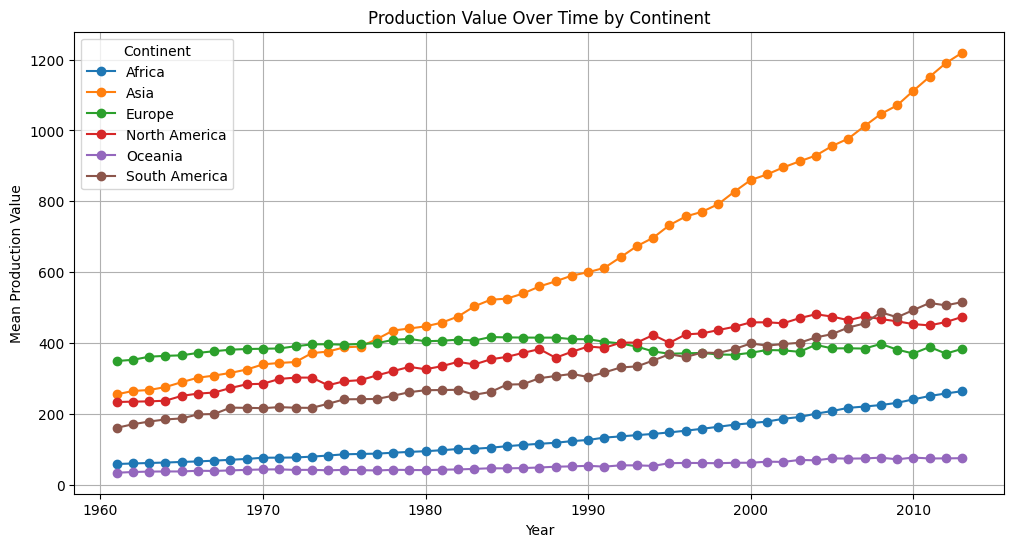

In [168]:
# Perform a group-by operation based on a relevant categorical variable (e.g., Year, Country, or Region).
# Analyze the aggregated data to identify trends over time or differences between groups. Visualize your findings using appropriate plots.

# Group-by operation based on 'YEAR' and 'CONTINENT'
grouped_continent_data = merged_df.groupby(['CONTINENT', 'YEAR']).agg({
    'PRODUCTION_VALUE': 'mean',
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Print the aggregated data
print("Aggregated Data by CONTINENT:\n", grouped_continent_data)

# Visualize
# Plotting trends over time for 'PRODUCTION_VALUE'
plt.figure(figsize=(12, 6))
for continent in grouped_continent_data['CONTINENT'].unique():
    plt.plot(grouped_continent_data[grouped_continent_data['CONTINENT'] == continent]['YEAR'], 
             grouped_continent_data[grouped_continent_data['CONTINENT'] == continent]['PRODUCTION_VALUE'], 
             marker='o', label=continent)

plt.title('Production Value Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Mean Production Value')
plt.legend(title='Continent')
plt.grid(True)
plt.show()

Aggregated Data by Asian SUBREGIONS:
         SUBREGION  YEAR  PRODUCTION_VALUE  PRODUCTION_GROWTH
0    Central Asia  1961        168.396552                inf
1    Central Asia  1962        168.396552                inf
2    Central Asia  1963        168.396552                inf
3    Central Asia  1964        168.396552                inf
4    Central Asia  1965        168.396552                inf
..            ...   ...               ...                ...
265  Western Asia  2010        195.741573                inf
266  Western Asia  2011        201.894944                inf
267  Western Asia  2012        212.992135                inf
268  Western Asia  2013        224.842697                inf
269  Western Asia  2017               NaN                0.0

[270 rows x 4 columns]


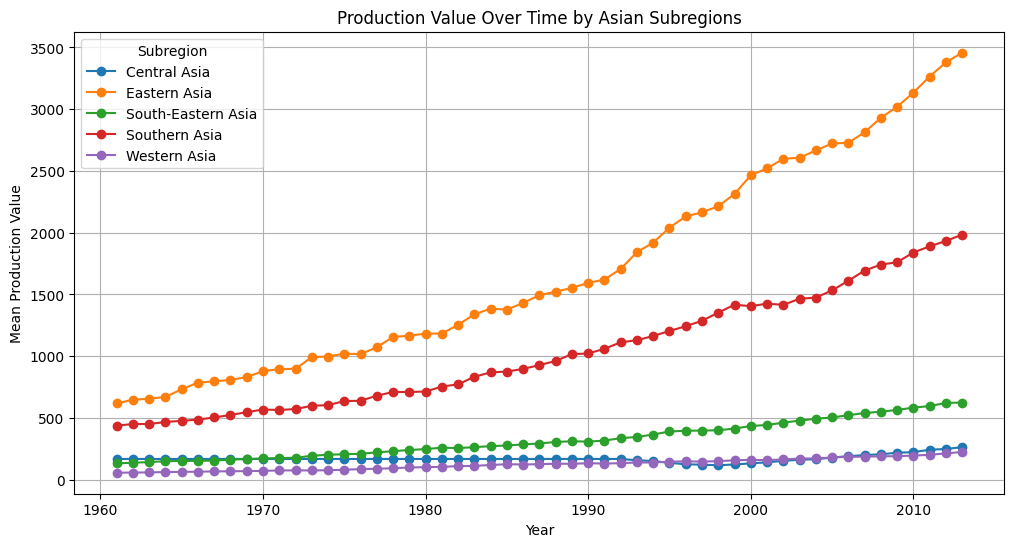

In [169]:
# Defining a list of Asian subregions according to the UN geoscheme.

asian_subregions = [
    'Central Asia', 'Eastern Asia', 'South-Eastern Asia', 
    'Southern Asia', 'Western Asia'
]

# Filter the dataset to include only Asian subregions.
asian_data = merged_df[merged_df['SUBREGION'].isin(asian_subregions)]

# Group-by operation based on 'YEAR' and 'SUBREGION'.
grouped_asian_data = asian_data.groupby(['SUBREGION', 'YEAR']).agg({
    'PRODUCTION_VALUE': 'mean',
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Print the aggregated data
print("Aggregated Data by Asian SUBREGIONS:\n", grouped_asian_data)

# Visualize
# Plotting trends over time for 'PRODUCTION_VALUE'
plt.figure(figsize=(12, 6))
for subregion in grouped_asian_data['SUBREGION'].unique():
    plt.plot(grouped_asian_data[grouped_asian_data['SUBREGION'] == subregion]['YEAR'], 
             grouped_asian_data[grouped_asian_data['SUBREGION'] == subregion]['PRODUCTION_VALUE'], 
             marker='o', label=subregion)

plt.title('Production Value Over Time by Asian Subregions')
plt.xlabel('Year')
plt.ylabel('Mean Production Value')
plt.legend(title='Subregion')
plt.grid(True)
plt.show()

Aggregated Data by European SUBREGIONS:
           SUBREGION  YEAR  PRODUCTION_VALUE  PRODUCTION_GROWTH
0    Eastern Europe  1961        682.353204                inf
1    Eastern Europe  1962        672.443368                inf
2    Eastern Europe  1963        685.257079                inf
3    Eastern Europe  1964        688.169151                inf
4    Eastern Europe  1965        686.372578                inf
..              ...   ...               ...                ...
211  Western Europe  2010        524.351184                inf
212  Western Europe  2011        532.561277                inf
213  Western Europe  2012        524.813594                inf
214  Western Europe  2013        533.665294                inf
215  Western Europe  2017               NaN                0.0

[216 rows x 4 columns]


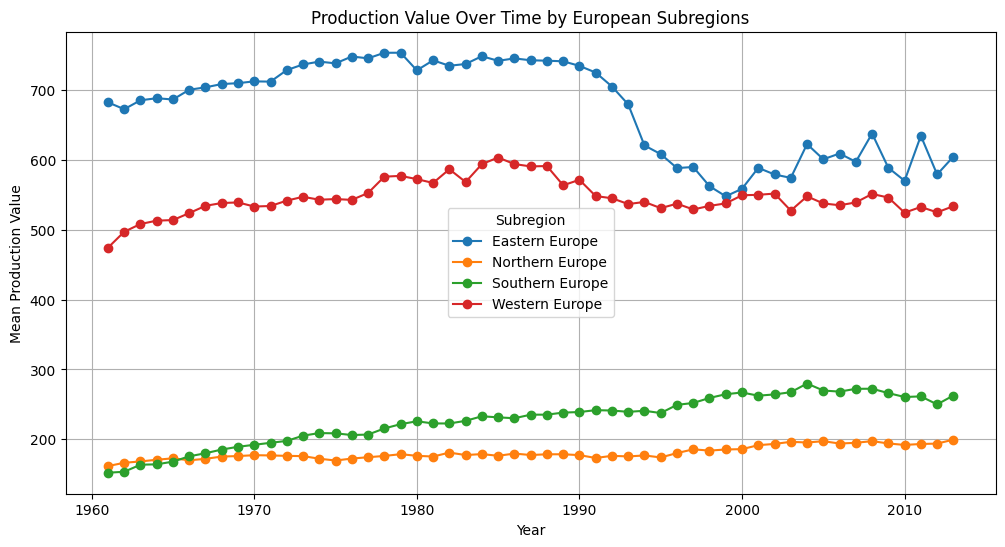

In [170]:
# Defining a list of European subregions according to the UN geoscheme.
european_subregions = [
    'Eastern Europe', 'Northern Europe', 'Southern Europe', 
    'Western Europe'
]

# Filter the dataset to include only European subregions
european_data = merged_df[merged_df['SUBREGION'].isin(european_subregions)]

# Group-by operation based on 'YEAR' and 'SUBREGION'
grouped_european_data = european_data.groupby(['SUBREGION', 'YEAR']).agg({
    'PRODUCTION_VALUE': 'mean',
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Print the aggregated data
print("Aggregated Data by European SUBREGIONS:\n", grouped_european_data)

# Visualize
# Plotting trends over time for 'PRODUCTION_VALUE'
plt.figure(figsize=(12, 6))
for subregion in grouped_european_data['SUBREGION'].unique():
    plt.plot(grouped_european_data[grouped_european_data['SUBREGION'] == subregion]['YEAR'], 
             grouped_european_data[grouped_european_data['SUBREGION'] == subregion]['PRODUCTION_VALUE'], 
             marker='o', label=subregion)

plt.title('Production Value Over Time by European Subregions')
plt.xlabel('Year')
plt.ylabel('Mean Production Value')
plt.legend(title='Subregion')
plt.grid(True)
plt.show()

Aggregated Data by African SUBREGIONS:
           SUBREGION  YEAR  PRODUCTION_VALUE  PRODUCTION_GROWTH
0    Eastern Africa  1961         60.029309                inf
1    Eastern Africa  1962         61.824843                inf
2    Eastern Africa  1963         62.259595                inf
3    Eastern Africa  1964         63.524075                inf
4    Eastern Africa  1965         64.773901                inf
..              ...   ...               ...                ...
265  Western Africa  2010        253.077178                inf
266  Western Africa  2011        267.584895                inf
267  Western Africa  2012        272.938809                inf
268  Western Africa  2013        277.326351                inf
269  Western Africa  2017               NaN                0.0

[270 rows x 4 columns]


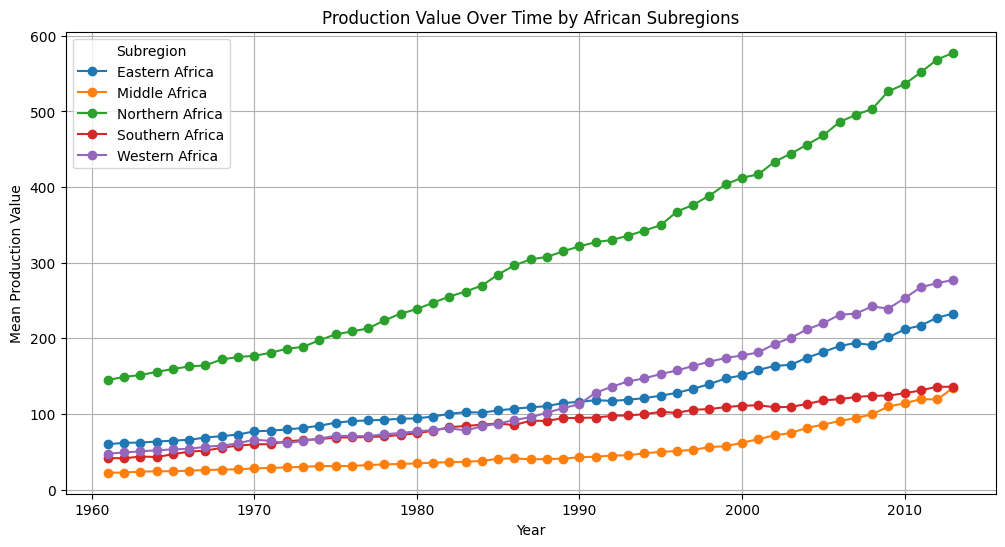

In [171]:
# Define a list of African subregions according to the UN geoscheme
african_subregions = [
    'Northern Africa', 'Eastern Africa', 'Middle Africa', 
    'Southern Africa', 'Western Africa'
]

# Filter the dataset to include only African subregions
african_data = merged_df[merged_df['SUBREGION'].isin(african_subregions)]

# Group-by operation based on 'YEAR' and 'SUBREGION'
grouped_african_data = african_data.groupby(['SUBREGION', 'YEAR']).agg({
    'PRODUCTION_VALUE': 'mean',
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Print the aggregated data
print("Aggregated Data by African SUBREGIONS:\n", grouped_african_data)

# Visualize
# Plotting trends over time for 'PRODUCTION_VALUE'
plt.figure(figsize=(12, 6))
for subregion in grouped_african_data['SUBREGION'].unique():
    plt.plot(grouped_african_data[grouped_african_data['SUBREGION'] == subregion]['YEAR'], 
             grouped_african_data[grouped_african_data['SUBREGION'] == subregion]['PRODUCTION_VALUE'], 
             marker='o', label=subregion)

plt.title('Production Value Over Time by African Subregions')
plt.xlabel('Year')
plt.ylabel('Mean Production Value')
plt.legend(title='Subregion')
plt.grid(True)
plt.show()

Aggregated Data by Oceanian SUBREGIONS:
                      SUBREGION  YEAR  PRODUCTION_VALUE  PRODUCTION_GROWTH
0    Australia and New Zealand  1961        127.557252                inf
1    Australia and New Zealand  1962        135.202290                inf
2    Australia and New Zealand  1963        140.030534                inf
3    Australia and New Zealand  1964        141.068702                inf
4    Australia and New Zealand  1965        140.889313                inf
..                         ...   ...               ...                ...
211                  Polynesia  2010          3.165939                inf
212                  Polynesia  2011          3.117904                inf
213                  Polynesia  2012          3.301310                inf
214                  Polynesia  2013          3.270742                inf
215                  Polynesia  2017               NaN                0.0

[216 rows x 4 columns]


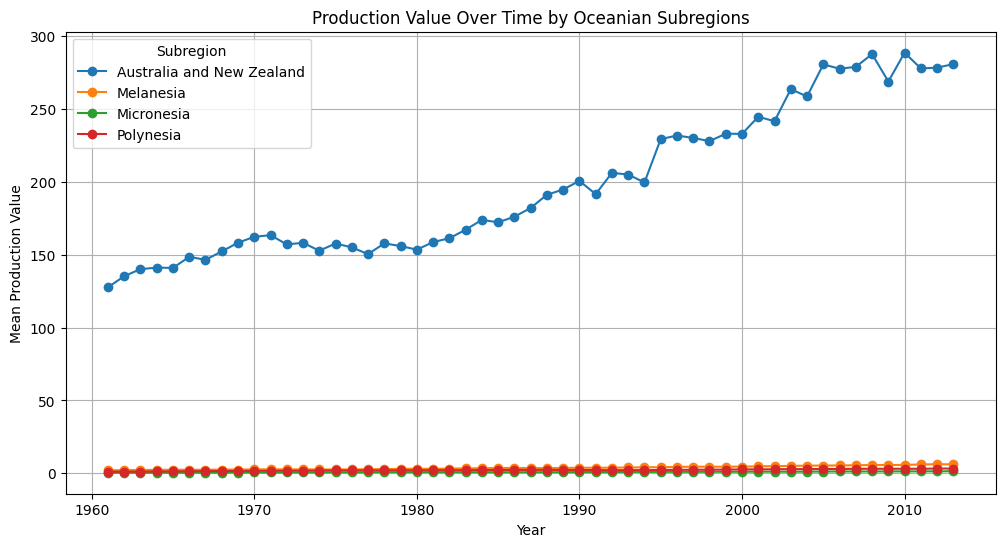

In [174]:
# Define a list of Oceanian subregions according to the UN geoscheme
oceania_subregions = [
    'Australia and New Zealand', 'Melanesia', 'Micronesia', 'Polynesia' 
]

# Filter the dataset to include only African subregions
oceania_data = merged_df[merged_df['SUBREGION'].isin(oceania_subregions)]

# Group-by operation based on 'YEAR' and 'SUBREGION'
grouped_oceanian_data = oceania_data.groupby(['SUBREGION', 'YEAR']).agg({
    'PRODUCTION_VALUE': 'mean',
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Print the aggregated data
print("Aggregated Data by Oceanian SUBREGIONS:\n", grouped_oceanian_data)

# Visualize
# Plotting trends over time for 'PRODUCTION_VALUE'
plt.figure(figsize=(12, 6))
for subregion in grouped_oceanian_data['SUBREGION'].unique():
    plt.plot(grouped_oceanian_data[grouped_oceanian_data['SUBREGION'] == subregion]['YEAR'], 
             grouped_oceanian_data[grouped_oceanian_data['SUBREGION'] == subregion]['PRODUCTION_VALUE'], 
             marker='o', label=subregion)

plt.title('Production Value Over Time by Oceanian Subregions')
plt.xlabel('Year')
plt.ylabel('Mean Production Value')
plt.legend(title='Subregion')
plt.grid(True)
plt.show()

Aggregated Data by Oceanian SUBREGIONS:
          SUBREGION  YEAR  PRODUCTION_VALUE  PRODUCTION_GROWTH
0        Caribbean  1961         13.931262                inf
1        Caribbean  1962         12.727693                inf
2        Caribbean  1963         13.382683                inf
3        Caribbean  1964         14.080635                inf
4        Caribbean  1965         13.973562                inf
..             ...   ...               ...                ...
211  South America  2010        492.788018                inf
212  South America  2011        512.776827                inf
213  South America  2012        506.181040                inf
214  South America  2013        515.252798                inf
215  South America  2017               NaN                0.0

[216 rows x 4 columns]


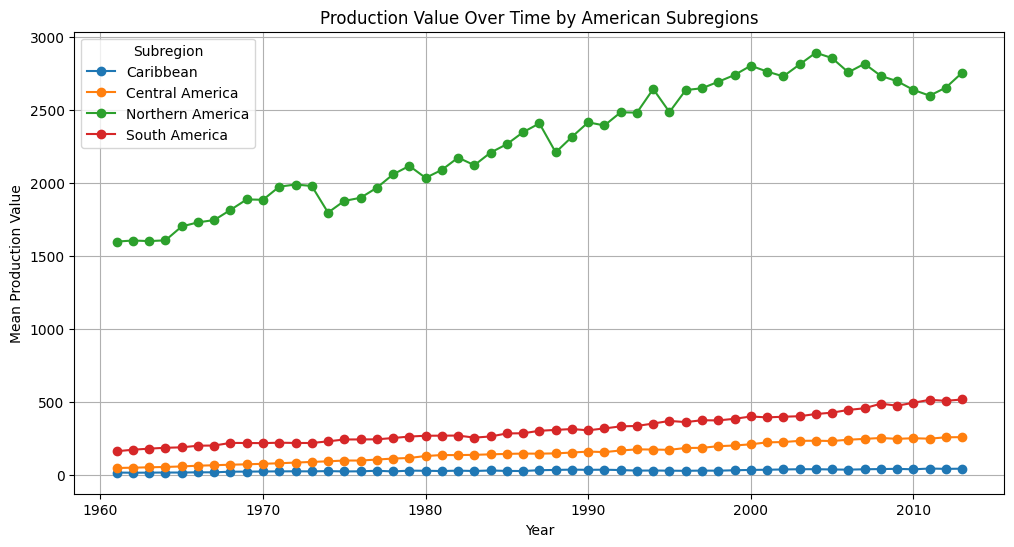

In [176]:
# Define a list of American subregions according to the UN geoscheme
american_subregions = [
    'Caribbean', 'Central America', 'Northern America', 'South America' 
]

# Filter the dataset to include only African subregions
american_data = merged_df[merged_df['SUBREGION'].isin(american_subregions)]

# Group-by operation based on 'YEAR' and 'SUBREGION'
grouped_american_data = american_data.groupby(['SUBREGION', 'YEAR']).agg({
    'PRODUCTION_VALUE': 'mean',
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Print the aggregated data
print("Aggregated Data by Oceanian SUBREGIONS:\n", grouped_american_data)

# Visualize
# Plotting trends over time for 'PRODUCTION_VALUE'
plt.figure(figsize=(12, 6))
for subregion in grouped_american_data['SUBREGION'].unique():
    plt.plot(grouped_american_data[grouped_american_data['SUBREGION'] == subregion]['YEAR'], 
             grouped_american_data[grouped_american_data['SUBREGION'] == subregion]['PRODUCTION_VALUE'], 
             marker='o', label=subregion)

plt.title('Production Value Over Time by American Subregions')
plt.xlabel('Year')
plt.ylabel('Mean Production Value')
plt.legend(title='Subregion')
plt.grid(True)
plt.show()

C:\Users\Acwer\AppData\Local\Temp\ipykernel_8508\2015033590.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




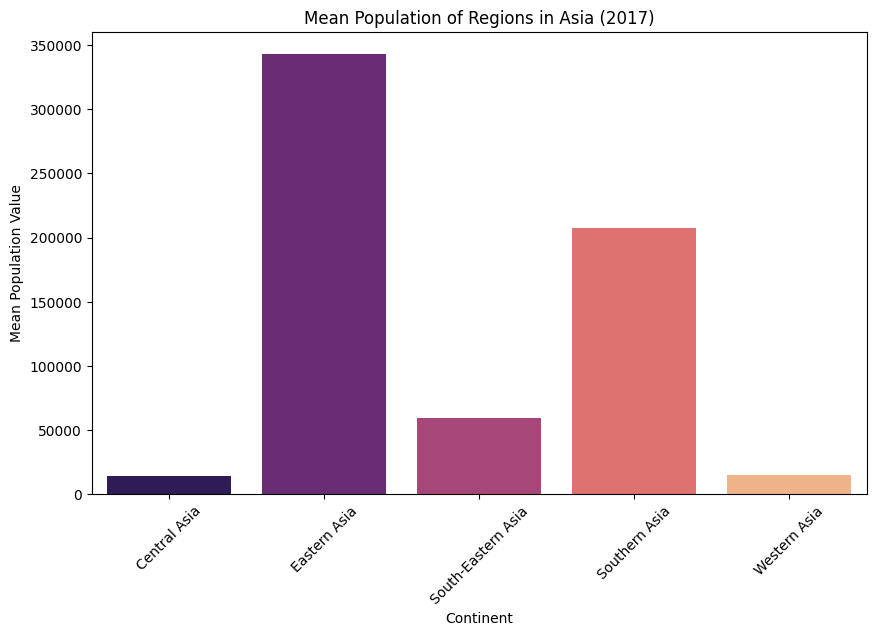

In [178]:
# Group-by operation based on 'YEAR' and 'SUBREGION'.
grouped_pop_asian_data = asian_data.groupby(['SUBREGION', 'YEAR']).agg({
    'POPULATION_VALUE': 'mean',
}).reset_index()

grouped_pop_european_data = european_data.groupby(['SUBREGION', 'YEAR']).agg({
    'POPULATION_VALUE': 'mean',
}).reset_index()

grouped_pop_african_data = african_data.groupby(['SUBREGION', 'YEAR']).agg({
    'POPULATION_VALUE': 'mean',
}).reset_index()

grouped_pop_oceanian_data = oceania_data.groupby(['SUBREGION', 'YEAR']).agg({
    'POPULATION_VALUE': 'mean',
}).reset_index()

grouped_pop_american_data = american_data.groupby(['SUBREGION', 'YEAR']).agg({
    'POPULATION_VALUE': 'mean',
}).reset_index()

# Mean Population Value of Regions in Asia (2017 only)
plt.figure(figsize=(10, 6))
sns.barplot(x='SUBREGION', y='POPULATION_VALUE', data=grouped_pop_asian_data, palette='magma')
plt.title('Mean Population of Regions in Asia (2017)')
plt.xlabel('Continent')
plt.ylabel('Mean Population Value')
plt.xticks(rotation=45)
plt.show()

C:\Users\Acwer\AppData\Local\Temp\ipykernel_8508\3870262629.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




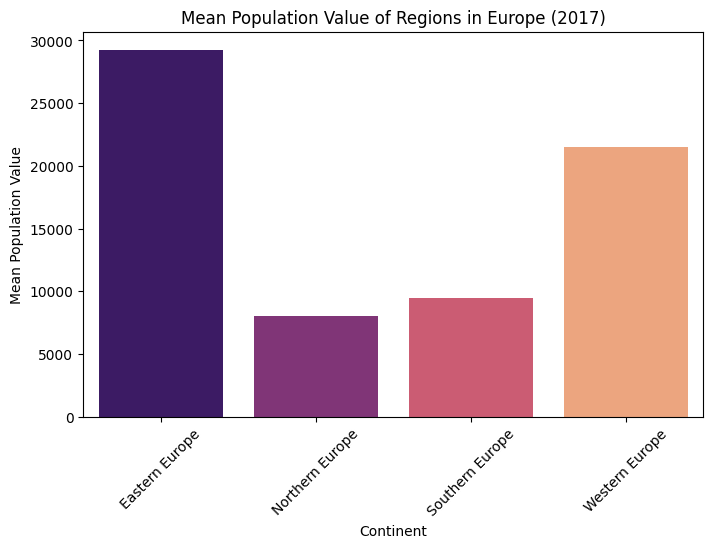

In [127]:
# Mean Population Value of Regions in Europe (2017 only)
plt.figure(figsize=(8, 5))
sns.barplot(x='SUBREGION', y='POPULATION_VALUE', data=grouped_pop_european_data, palette='magma')
plt.title('Mean Population Value of Regions in Europe (2017)')
plt.xlabel('Continent')
plt.ylabel('Mean Population Value')
plt.xticks(rotation=45)
plt.show()

C:\Users\Acwer\AppData\Local\Temp\ipykernel_8508\344346247.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




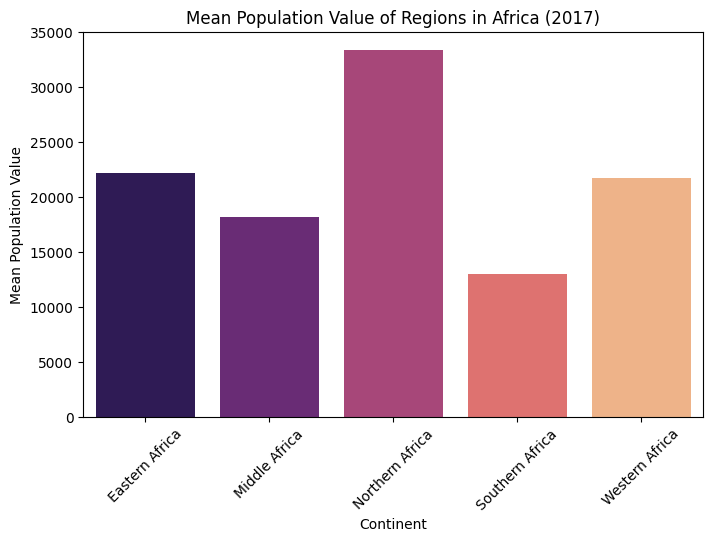

In [128]:
# Mean Population Value of Regions in Africa (2017 only)
plt.figure(figsize=(8, 5))
sns.barplot(x='SUBREGION', y='POPULATION_VALUE', data=grouped_pop_african_data, palette='magma')
plt.title('Mean Population Value of Regions in Africa (2017)')
plt.xlabel('Continent')
plt.ylabel('Mean Population Value')
plt.xticks(rotation=45)
plt.show()

C:\Users\Acwer\AppData\Local\Temp\ipykernel_8508\3844384225.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




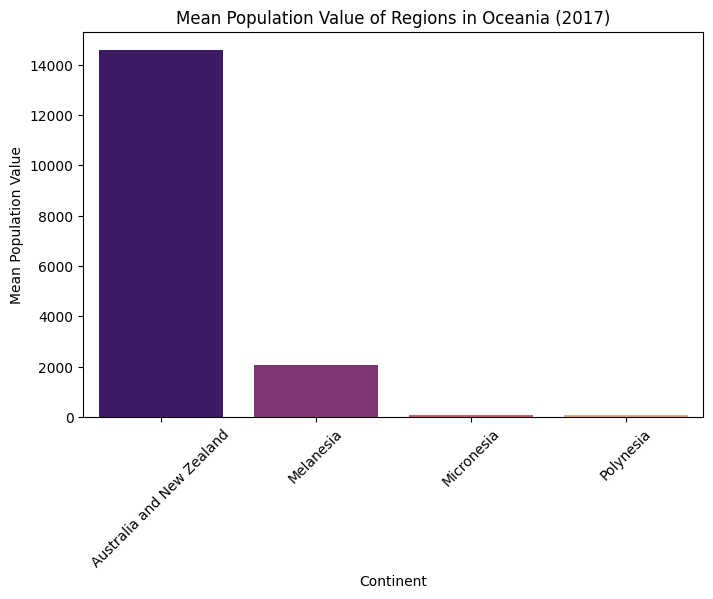

In [179]:
# Mean Population Value of Regions in Oceania (2017 only)
plt.figure(figsize=(8, 5))
sns.barplot(x='SUBREGION', y='POPULATION_VALUE', data=grouped_pop_oceanian_data, palette='magma')
plt.title('Mean Population Value of Regions in Oceania (2017)')
plt.xlabel('Continent')
plt.ylabel('Mean Population Value')
plt.xticks(rotation=45)
plt.show()

C:\Users\Acwer\AppData\Local\Temp\ipykernel_8508\2841510718.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




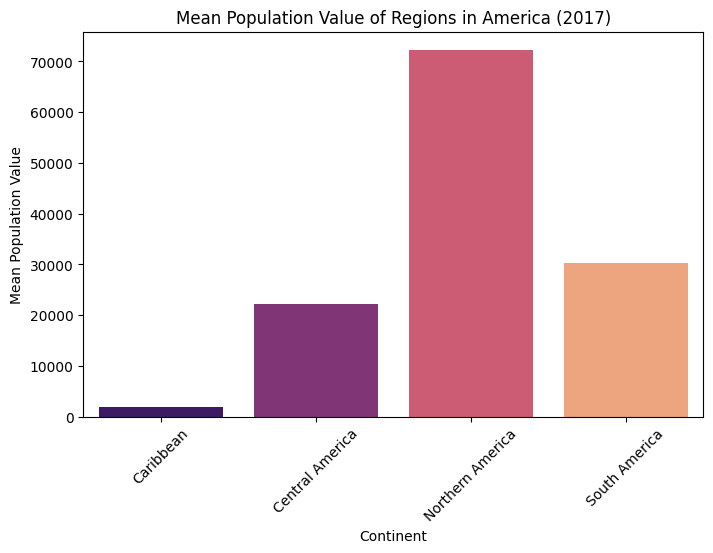

In [180]:
# Mean Population Value of Regions in American (2017 only)
plt.figure(figsize=(8, 5))
sns.barplot(x='SUBREGION', y='POPULATION_VALUE', data=grouped_pop_american_data, palette='magma')
plt.title('Mean Population Value of Regions in America (2017)')
plt.xlabel('Continent')
plt.ylabel('Mean Population Value')
plt.xticks(rotation=45)
plt.show()

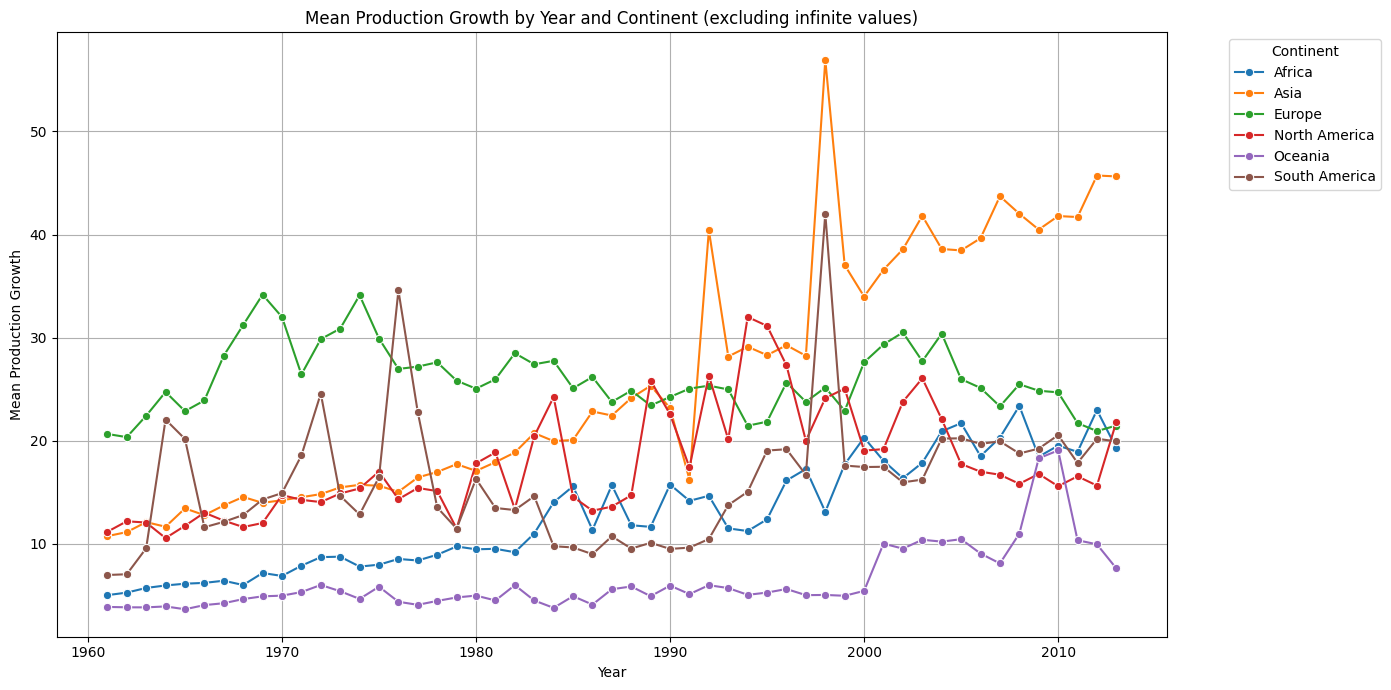

In [129]:
# Filter out infinite values
filtered_df = merged_df[~np.isinf(merged_df['PRODUCTION_GROWTH'])]
filtered_df = filtered_df[filtered_df['YEAR'] != 2017]

# Perform the group-by operation and calculate the mean, grouping by both 'YEAR' and 'CONTINENT'
grouped_data = filtered_df.groupby(['YEAR', 'CONTINENT']).agg({
    'PRODUCTION_GROWTH': 'mean'
}).reset_index()

# Plot the aggregated data
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_data, x='YEAR', y='PRODUCTION_GROWTH', hue='CONTINENT', marker='o')

plt.title('Mean Production Growth by Year and Continent (excluding infinite values)')
plt.xlabel('Year')
plt.ylabel('Mean Production Growth')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.show()

3. Correlation Analysis:
    - Compute the correlation matrix for the numerical variables in your dataset.
    - Identify and discuss any strong correlations. Use a heatmap to visualize the correlation matrix.

Correlation Matrix:
                    PRODUCTION_VALUE  PRODUCTION_GROWTH      YEAR  \
PRODUCTION_VALUE           1.000000           0.137462  0.028007   
PRODUCTION_GROWTH          0.137462           1.000000  0.010141   
YEAR                       0.028007           0.010141  1.000000   
POPULATION_VALUE                NaN                NaN       NaN   

                   POPULATION_VALUE  
PRODUCTION_VALUE                NaN  
PRODUCTION_GROWTH               NaN  
YEAR                            NaN  
POPULATION_VALUE                1.0  


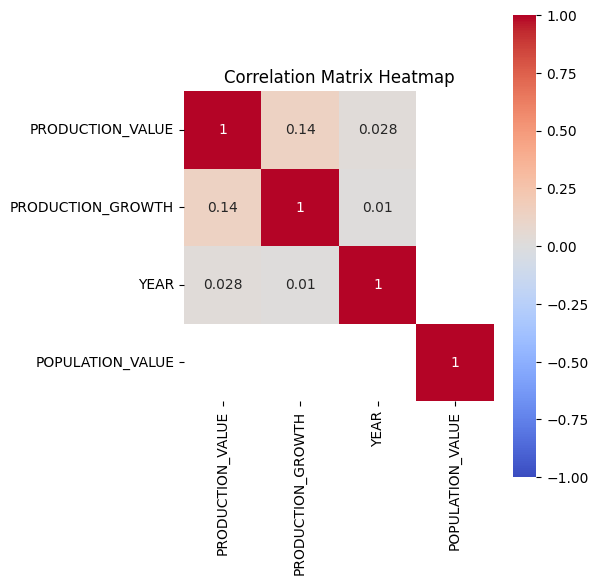

In [130]:
# Compute the correlation matrix for the numerical variables in your dataset.
# Identify and discuss any strong correlations. Use a heatmap to visualize the correlation matrix.

# Compute the correlation matrix for the numerical variables
correlation_matrix = merged_df[['PRODUCTION_VALUE', 'PRODUCTION_GROWTH', 'YEAR', 'POPULATION_VALUE']].corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(5,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

Based on the correlation matrix, PRODUCTION_VALUE and PRODUCTION_GROWTH the greatest correlation with each other. This indicates that increasing PRODUCTION_VALUE will also increase the PRODUCTION_GROWTH. In addition, YEAR also show positive correlation with both PRODUCTION_VALUE AND PRODUCTION_GROWTH albeit only a small amounts. This could indicate that as the year progress, both FAO productions will follow an increasing trend. On the otherhand, POPULATION_VALUE does not show any correlation with the other variable. This is possibly due to the nature of the data from FAOSTAT which only contains population only in 2017. 

# Task 3: Data Visualization

1. Time Series Analysis:
    - Create a line plot showing trends over time for at least two variables. Ensure the plot is well-labeled and includes a legend.
    - Discuss any noticeable trends or patterns in the data over time.

In [131]:
# Create a line plot showing trends over time for at least two variables.
# Discuss any noticeable trends or patterns in the data over time.

In [132]:
# Filter the DataFrame for the year 1961 and only include rows where the ELEMENT is 'Food'
df_1961 = merged_df[merged_df['YEAR'] == 1961]
df_1961 = df_1961[df_1961['ELEMENT'] == 'Food']

# Find the row with the maximum production value for food in 1961
max_production_row = df_1961.loc[df_1961['PRODUCTION_VALUE'].idxmax()]

# Print the row with the maximum production value for food in 1961
print("Row with maximum production value for food in 1961:")
print(max_production_row)

# Filter the DataFrame for the year 1961 and only include rows where the ELEMENT is 'Feed'
df_1961 = merged_df[merged_df['YEAR'] == 1961]
df_1961 = df_1961[df_1961['ELEMENT'] == 'Feed']

# Find the row with the maximum production value for feed in 1961
max_production_row = df_1961.loc[df_1961['PRODUCTION_VALUE'].idxmax()]

# Print the row with the maximum production value for feed in 1961
print("Row with maximum production value for feed in 1961:")
print(max_production_row)

Row with maximum production value for food in 1961:
AREA                 China, mainland
YEAR                            1961
ITEM                   Starchy Roots
ELEMENT                         Food
PRODUCTION_VALUE             74071.0
POPULATION_VALUE                 NaN
CONTINENT                       Asia
PRODUCTION_GROWTH           8.056242
SUBREGION               Eastern Asia
Name: 4239, dtype: object
Row with maximum production value for feed in 1961:
AREA                 United States of America
YEAR                                     1961
ITEM                 Cereals - Excluding Beer
ELEMENT                                  Feed
PRODUCTION_VALUE                     112227.0
POPULATION_VALUE                          NaN
CONTINENT                       North America
PRODUCTION_GROWTH                         inf
SUBREGION                    Northern America
Name: 20506, dtype: object


In [133]:
# Filter the DataFrame for the year 2013 and only include rows where the ELEMENT is 'Food'
df_2013 = merged_df[merged_df['YEAR'] == 2013]
df_2013 = df_2013[df_2013['ELEMENT'] == 'Food']

# Find the row with the maximum production value for food in 2013
max_production_row = df_2013.loc[df_2013['PRODUCTION_VALUE'].idxmax()]

# Print the row with the maximum production value for food in 2013
print("Row with maximum production value for food in 2013:")
print(max_production_row)

# Filter the DataFrame for the year 2013 and only include rows where the ELEMENT is 'Feed'
df_2013 = merged_df[merged_df['YEAR'] == 2013]
df_2013 = df_2013[df_2013['ELEMENT'] == 'Feed']

# Find the row with the maximum production value for feed in 2013
max_production_row = df_2013.loc[df_2013['PRODUCTION_VALUE'].idxmax()]

# Print the row with the maximum production value for feed in 2013
print("Row with maximum production value for feed in 2013:")
print(max_production_row)


Row with maximum production value for food in 2013:
AREA                 China, mainland
YEAR                            2013
ITEM                      Vegetables
ELEMENT                         Food
PRODUCTION_VALUE            489299.0
POPULATION_VALUE                 NaN
CONTINENT                       Asia
PRODUCTION_GROWTH          12.751307
SUBREGION               Eastern Asia
Name: 1121053, dtype: object
Row with maximum production value for feed in 2013:
AREA                          China, mainland
YEAR                                     2013
ITEM                 Cereals - Excluding Beer
ELEMENT                                  Feed
PRODUCTION_VALUE                     193043.0
POPULATION_VALUE                          NaN
CONTINENT                                Asia
PRODUCTION_GROWTH                 1594.396694
SUBREGION                        Eastern Asia
Name: 1121040, dtype: object


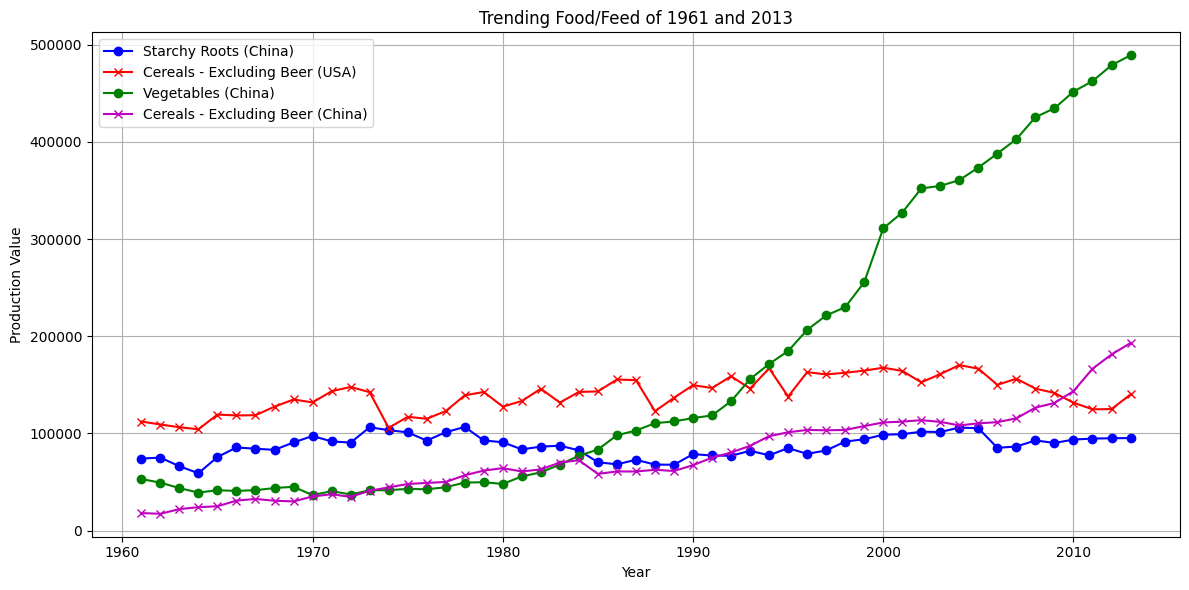

In [134]:
# Filter for "Starchy Roots" in China for the 'Food' element in 1961
biggest_food_1961 = merged_df[
    (merged_df['ITEM'] == 'Starchy Roots') &
    (merged_df['AREA'] == 'China, mainland') &
    (merged_df['ELEMENT'] == 'Food')
]

# Filter for "Cereals - Excluding Beer" in the USA for the 'Feed' element in 1961
biggest_feed_1961 = merged_df[
    (merged_df['ITEM'] == 'Cereals - Excluding Beer') &
    (merged_df['AREA'] == 'United States of America') &
    (merged_df['ELEMENT'] == 'Feed')
]

# Filter for "Vegetables" in China for the 'Food' element in 2013
biggest_food_2013 = merged_df[
    (merged_df['ITEM'] == 'Vegetables') &
    (merged_df['AREA'] == 'China, mainland') &
    (merged_df['ELEMENT'] == 'Food') 
]

# Filter for "Cereals - Excluding Beer" in China for the 'Feed' element in 2013
biggest_feed_2013 = merged_df[
    (merged_df['ITEM'] == 'Cereals - Excluding Beer') &
    (merged_df['AREA'] == 'China, mainland') &
    (merged_df['ELEMENT'] == 'Feed')
]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(biggest_food_1961['YEAR'], biggest_food_1961['PRODUCTION_VALUE'], marker='o', color='b', label='Starchy Roots (China)')
plt.plot(biggest_feed_1961['YEAR'], biggest_feed_1961['PRODUCTION_VALUE'], marker='x', color='r', label='Cereals - Excluding Beer (USA)')
plt.plot(biggest_food_2013['YEAR'], biggest_food_2013['PRODUCTION_VALUE'], marker='o', color='g', label='Vegetables (China)')
plt.plot(biggest_feed_2013['YEAR'], biggest_feed_2013['PRODUCTION_VALUE'], marker='x', color='m', label='Cereals - Excluding Beer (China)')
plt.xlabel('Year'),
plt.ylabel('Production Value')
plt.title('Trending Food/Feed of 1961 and 2013')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This graph plots the trending items for foods and feeds in 1961 and 2013. Foods are marked by 'o', while Feeds are marked by ‘x.’ The graph shows that the trending food in 1961 was starchy foods and vegetables in 2013. It can be seen that the production of starchy foods in the years 1961 up to 1984 was greater than that of vegetables. In the upcoming year, the production of vegetables overtook starchy foods and continued to widen the gap in production in the following years. As for the production of feeds, it was observed in 1961 that the gap between the output of cereals of the USA and China is significant. Throughout the years, the USA produced cereals steadily in the range of 100,000-200,000. While China continuously increased its production from below 100,000 to just shy of 200,000 in 20134.


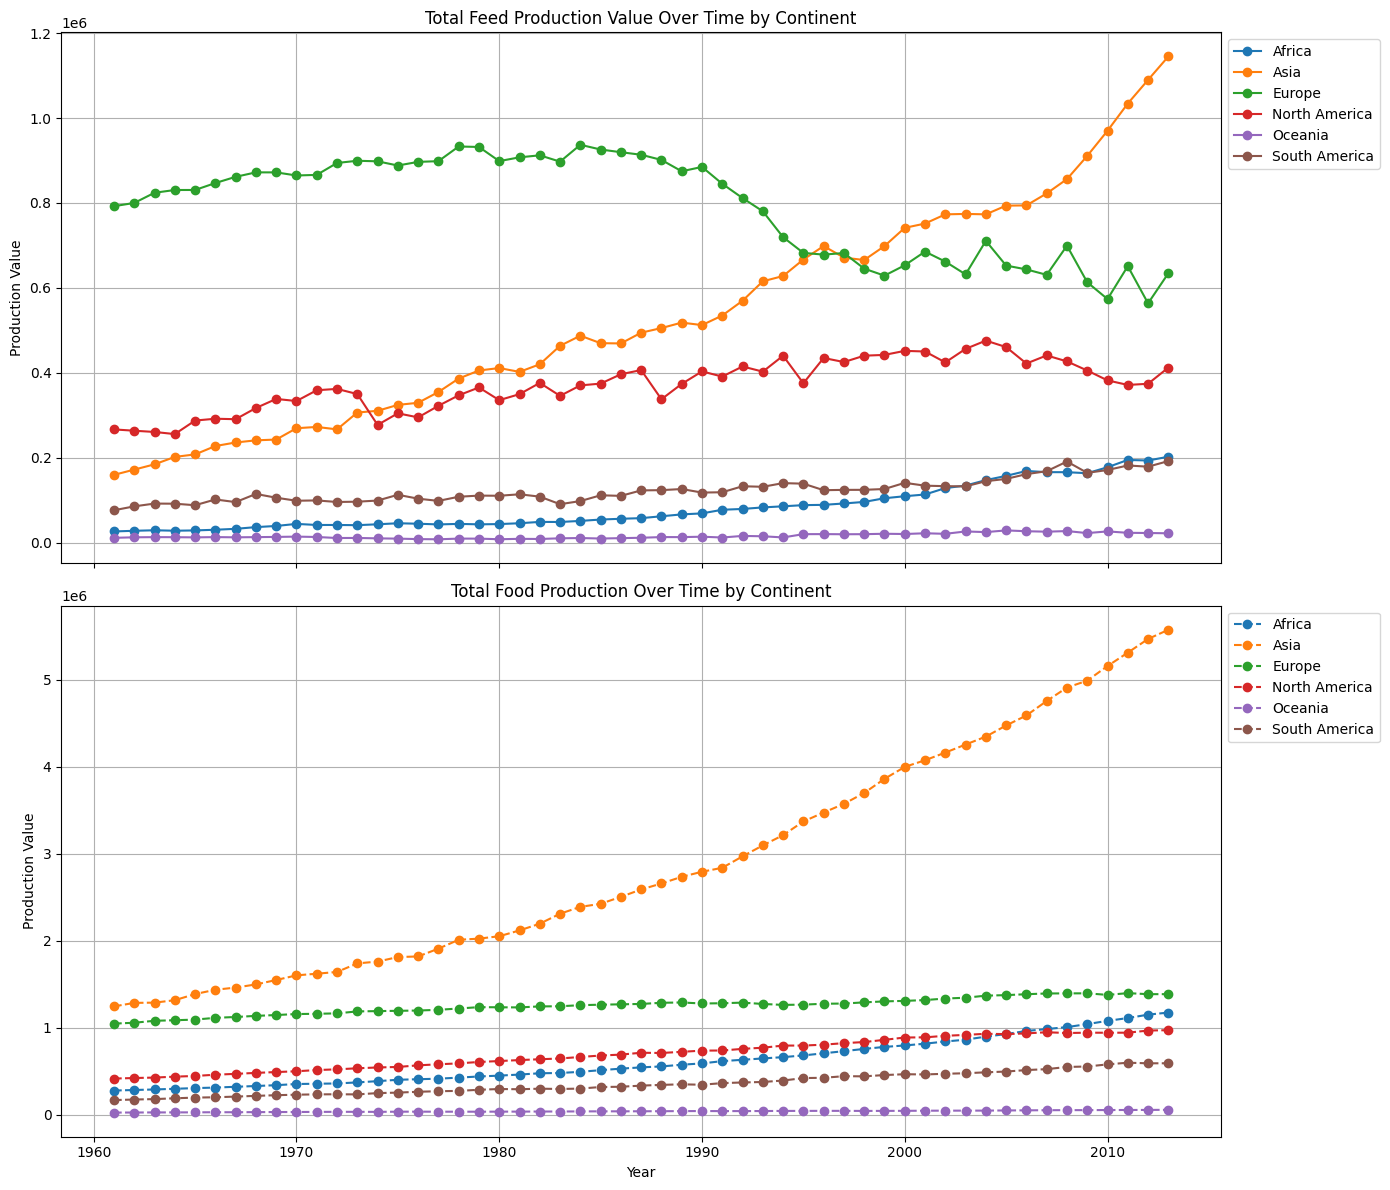

In [135]:
# Filter and pivot for 'Feed'
feed_df = merged_df[(merged_df['YEAR'] != 2017) & (merged_df['ELEMENT'] == 'Feed')]
feed_pivot_df = feed_df.pivot_table(index='YEAR', columns='CONTINENT', values='PRODUCTION_VALUE', aggfunc='sum')

# Filter and pivot for 'Food'
food_df = merged_df[(merged_df['YEAR'] != 2017) & (merged_df['ELEMENT'] == 'Food')]
food_pivot_df = food_df.pivot_table(index='YEAR', columns='CONTINENT', values='PRODUCTION_VALUE', aggfunc='sum')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# Plot for 'Feed'
for column in feed_pivot_df.columns:
    axes[0].plot(feed_pivot_df.index, feed_pivot_df[column], label=column, linestyle='-', marker='o')

axes[0].set_ylabel('Production Value')
axes[0].set_title('Total Feed Production Value Over Time by Continent')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].grid(True)

# Plot for 'Food'
for column in food_pivot_df.columns:
    axes[1].plot(food_pivot_df.index, food_pivot_df[column], label=column, linestyle='--', marker='o')

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Production Value')
axes[1].set_title('Total Food Production Over Time by Continent')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

The graph displays each continent's feed and food production from 1961-2013. The first graph shows that in 1961, the European countries had the highest collective production of feeds but steadily declined from 1990. While Asian countries were significantly behind in 1961, their output of feeds continuously increased until past European countries in 1996. The second graph shows that all continents had an almost stagnant food production output throughout the years except for Asian countries, which had continuously increased their food production.

2. Comparison Plot:
    - Create a bar chart or box plot to compare the distributions of a variable across different categories (e.g., regions, countries).
    - Provide insights based on your visualization.

In [136]:
# Create a bar chart or box plot to compare the distributions of a variable across different categories (e.g., regions, countries).
# Provide insights based on your visualization.

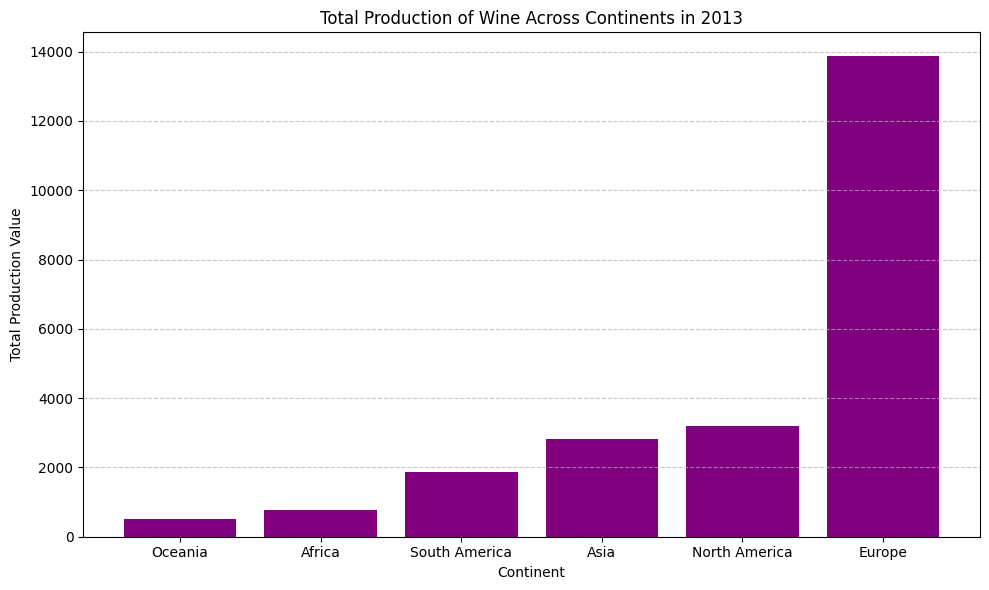

In [137]:
# Filter the DataFrame for the item "Wine" in 2013
wine_df = merged_df[
    (merged_df['YEAR'] == 2013) & 
    (merged_df['ITEM'] == 'Wine') & 
    (merged_df['ELEMENT'] == 'Food')
]

# Group by continent and sum the production values
wine_by_continent = wine_df.groupby('CONTINENT')['PRODUCTION_VALUE'].sum().sort_values()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(wine_by_continent.index, wine_by_continent.values, color='purple')
plt.xlabel('Continent')
plt.ylabel('Total Production Value')
plt.title('Total Production of Wine Across Continents in 2013')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart displays the total wine production across the continents. The diagram shows the significant differences between the production of wine from European countries compared to the rest. This indicates that European countries have a cultural emphasis on the consumption of wine. Due to the significant difference in the production rate of wine, it can be said that the economic condition of the wine industry is more favorable in Europe than in other countries. This also implies that European countries may be the biggest exporters of wine because of the significant production rate of wines.

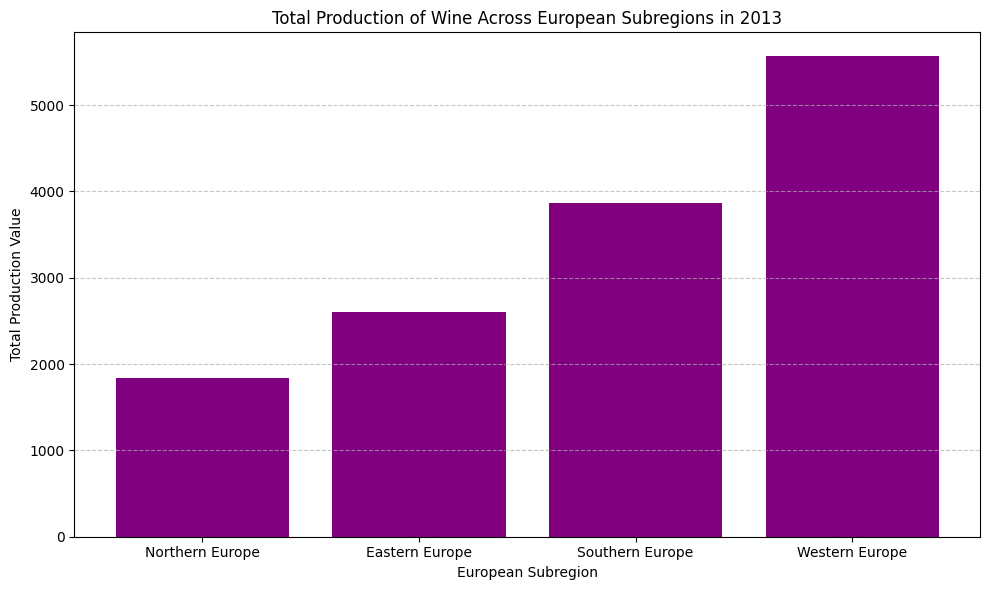

In [181]:
# Define a list of European subregions according to the UN geoscheme
european_subregions = [
    'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe'
]

# Filter the DataFrame for the item "Wine" in 2013 and only European subregions
wine_df = merged_df[
    (merged_df['YEAR'] == 2013) & 
    (merged_df['ITEM'] == 'Wine') & 
    (merged_df['ELEMENT'] == 'Food') & 
    (merged_df['SUBREGION'].isin(european_subregions))
]

# Group by subregion and sum the production values
wine_by_subregion = wine_df.groupby('SUBREGION')['PRODUCTION_VALUE'].sum().sort_values()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(wine_by_subregion.index, wine_by_subregion.values, color='purple')
plt.xlabel('European Subregion')
plt.ylabel('Total Production Value')
plt.title('Total Production of Wine Across European Subregions in 2013')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Geographical Visualization (Optional Advanced Task):
    - If applicable, create a choropleth map showing the distribution of a key variable across different countries or regions.
    - Analyze the geographical trends you observe.

In [138]:
# If applicable, create a choropleth map showing the distribution of a key variable across different countries or regions.
# Analyze the geographical trends you observe.

In [139]:
# Filter for the item 'Wine'
beer_df = merged_df[
    (merged_df['ITEM'] == 'Wine')
    # (merged_df['YEAR'] == 1961)
]

# Create the choropleth map
fig = px.choropleth(
    beer_df,
    locations="AREA",
    locationmode="country names",
    color="PRODUCTION_VALUE",
    animation_frame="YEAR",
    title="Distribution of Wine Production by Area Throughout the Years",
    color_continuous_scale=px.colors.sequential.Plasma
)

# Show the map
fig.show()

Here, it can be seen that in 1961, Europe produced the most wine individually and collectively, with Argentina competing against European countries. Throughout the years, the United States of America joined the competition and increased its production rate of wines. In the coming years, the USA surpassed most of the European countries in the production of wine, and with China joining the competition, the global production of wine increased further. In 2008, it can especially be seen that the USA surpassed most of the European countries, and in the following year, France increased its wine production significantly. This may be because of the looming threat of the USA surpassing it. 

Additionally, this map illustrates European countries' influence on wine production over the years. This also demonstrates France's dominance in wine production until it peaked in 1974. This year, major powers of the world have also started to increase their production of wines.

# Task 4: Drawing Conclusions


1. Analysis Summary:
    - Based on your analysis and visualizations, write a short report summarizing your findings.
    - Highlight key insights, trends, and any surprising results.
    - Discuss the potential implications of your findings in the context of global food security, agricultural production, or trade.

#### Findings and Observations

Based on the findings of the study, it was found that the continent of Europe initially came out on top in terms of production value and growth at the start of the 1960’s. However, over time Asia was able to overtake Europe in terms of those categories and become miles ahead of other continents by the 1990’s. Compared to other continents, Oceania had the consistent lowest production value and growth throughout the decades. This is understandable considering that it was found that Oceania was also the continent with the lowest mean population value. On the other hand, China had the highest population value, but interestingly, South America had the second highest mean population value compared to other continents, such as Africa. In addition, Europe had the highest mean production growth, which could be attributed to its consistency in maintaining high growth from the start of the 1960’s. Not surprisingly, Oceania had the lowest mean production growth.

It was found that production value and production growth had a moderate correlation with each other, which meant that as production growth increases, so does the value, and vice versa, production growth and year had the lowest correlation, indicating a lack of or very little influence on one another. 

In a comparison between starchy roots from China, cereals with the exclusion of beer from the USA, vegetables from China, and cereals excluding beer from China, the trending food or feed from the 1960’s to 1980’s was cereal from the USA. From the 90s to the '10s, the trend for vegetables from China went on a sharp increase compared to foods or feed, making it the top trending food in those decades. When it comes to the total feed production, Europe initially came on top from the 1960s to the late early 1990s. After the early 1990’s, it was overtaken by Asia, and the production value in Europe remained in stagnation with slight fluctuations. When it comes to total food production over time, Asia came out on top in all of the decades. In the analysis of wine production, Europe produced the wines significantly compared to all other continents.

#### Global Implications

All in all, the said findings have major implications on certain regions of the world. The low production of food or feed in Oceania could cascade into more and more concerning challenges such as limited arable land as population grows and heavy reliance on imports. Oceania in the future, excluding countries with larger territories such as Australia, may face food shortages and low numbers of food to feed the people. Despite that, the low production growth could attract potential investors from other parts of the world to build on Oceania’s technology in increasing its food and feed production. This potential also applies to other continents that have low production growth and mean. With Asia becoming the leading food and feed producer in comparison to other continents, it has the potential to influence global trade dynamics which could affect global prices, supply chains, and trade agreements. As production of food and feed significantly increases in Asia in the recent decades, there is also the global concern of climate change. With certain machinery that increases carbon emission and the mass stockings of animals and high population growth, Asia is a hotspot for contributing to climate change in the food and feed production aspect.

#### Summary of Findings

In summary, Europe initially had the highest production value and growth at the start of the 60’s and onwards towards the late 1980’s. After the 1980’s, Asia started to produce the most food or feed over time, upkeep its status as a leader in food and feed production compared to all other continents. This could be explained by the increasing economic growth and high population growth on the Asian continent.over years starting in the early 1990s.

2. Actionable Recommendations:
    - Based on the data analysis, provide at least two recommendations for policymakers or stakeholders in the agriculture sector.
    - Justify your recommendations with specific references to the data and visualizations you’ve created.

Based on the visualization of the production value over time and mean production growth over the years with the continent of Oceania consistently being at the bottom, policy makers or authorities in those countries should make a priority on the investment of agricultural innovation and advancing farming techniques despite the little land area in order to prevent possible food shortages and be more competitive in the world stage. 

On the opposite side, with the observation based on the same visualizations through line plots, lawmakers and high positioned officials should keep an eye on the practices of the companies or groups of people that produce the said foods or feeds in order to keep up with the correct practices and prevent environmental degradation. As Asia consistently grows high in the production department and population, high ranking officials should make sure right practices are undertaken to promote sustainability and further food growth.